In [1]:
import torch
%matplotlib inline
import seaborn as sns

In [2]:
import sys
sys.path.append('..')

In [3]:
model_path = '../output/ablation-cifar10-models2/relog-quadratic-maxout_4.pkl'

In [4]:
model = torch.load(model_path, map_location=torch.device('cpu'))

In [21]:
def extract_quadratic_weights(m):
    weights = []
    for layer in list(m.features) + list(m.classifier):
        if hasattr(layer, '_quadratic'):
            weights.append(layer._quadratic.weight)
    return torch.cat([w.flatten() for w in weights])

In [23]:
w = extract_quadratic_weights(model)

In [24]:
w.shape

torch.Size([37769216])

In [25]:
w.abs().mean()

tensor(0.0074, grad_fn=<MeanBackward0>)

In [26]:
w.abs().std()

tensor(0.0043, grad_fn=<StdBackward0>)

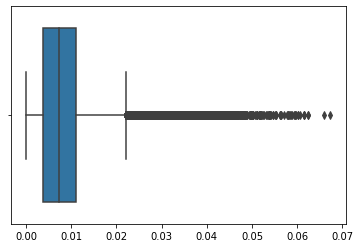

In [27]:
_ = sns.boxplot(w.abs().flatten().detach().numpy())